# GeoPandas

https://geopandas.org/ A python package for reading, writing and processing geographical data. It has useful helper functions to query, index and manipulate geometric objects. Specifically those related to geographic objects.

Other useful packages which geopandas uses:
* pandas https://pandas.pydata.org/
* shapely https://github.com/Toblerity/Shapely
* pyproj https://pyproj4.github.io/pyproj/stable/
* geopy https://github.com/geopy/geopy
* rtree https://github.com/Toblerity/rtree
* ...

## Installation

According to GeoPandas, you might have issues using pip on Windows. To be safe, use conda for installing binaries directly.

In [ ]:
!pip3 install geopandas

In [ ]:
!conda install -c conda-forge geopandas

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Data

Some options for reading data into GeoPandas DataFrames (the main difference is specifying the geometry column)

* Just like Pandas. A GeoPandas DataFrame is a Pandas DataFrame with a geometry (column)
* Has some helpful built-in data
* SQL
* ...

### Using Pandas DataFrames

* First, build a Pandas DataFrame
* Second, use it to create a GeoDataFrame while specifying the geometry column

In [3]:
# First create a Pandas DataFrame
df = pd.DataFrame({
    'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]
})

In [5]:
# Then create a GeoPandas DataFrame from the Pandas DataFrame

# From lat lng
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

In [6]:
gdf.head(2)

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)


### Using Built-in Data

* There are a few available datasets

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))

In [8]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [9]:
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


### Data from the internet
* One can read GeoJSON or shape files directly from the internet

In [ ]:
world_high_res = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip")

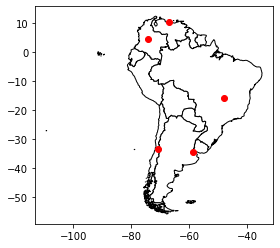

In [397]:
ax = world_high_res[world_high_res.CONTINENT == "South America"].plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color='red')

plt.show()

## GeoDataFrame

* A Class which inherits from the Pandas DataFrame Class
* Has a predefined geometry column (points, polygons, multipolygons)
* Exposes geographic methods and properties:
  * intersects
  * touches
  * sindex
  * crs
  * ...

In [20]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [75]:
type(world.geometry)

geopandas.geoseries.GeoSeries

### CRS (Coordinate Reference System)

In [21]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
world.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

## Working with Geo Data

### Area of Polygons

In [23]:
# 54009 is a reference system that preserves area
world["geometry_ESRI:54009"] = world["geometry"].to_crs("ESRI:54009")
world["area"] = world["geometry_ESRI:54009"].area // 1e6

In [441]:
world[world.name == "Germany"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geometry_ESRI:54009,area
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...","POLYGON ((1018674.630 6261050.121, 1043430.938...",356928.0


In [442]:
world.sort_values("area", ascending=False).head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geometry_ESRI:54009,area
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...","MULTIPOLYGON (((8769033.872 7865244.997, 87094...",16953324.0
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.661 -78.047, -48.151 -78.0...","MULTIPOLYGON (((-1784201.372 -8394731.809, -17...",11990339.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0...","MULTIPOLYGON (((-9464830.276 5768352.350, -947...",9996089.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...","MULTIPOLYGON (((-9464830.276 5768352.350, -924...",9526449.0
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508...","MULTIPOLYGON (((10629598.599 2235514.570, 1053...",9428688.0


# Plotting more than just geo data

In [59]:
GDP = (world.gdp_md_est * 100 / world.pop_est).clip(0, 10)

<AxesSubplot:>

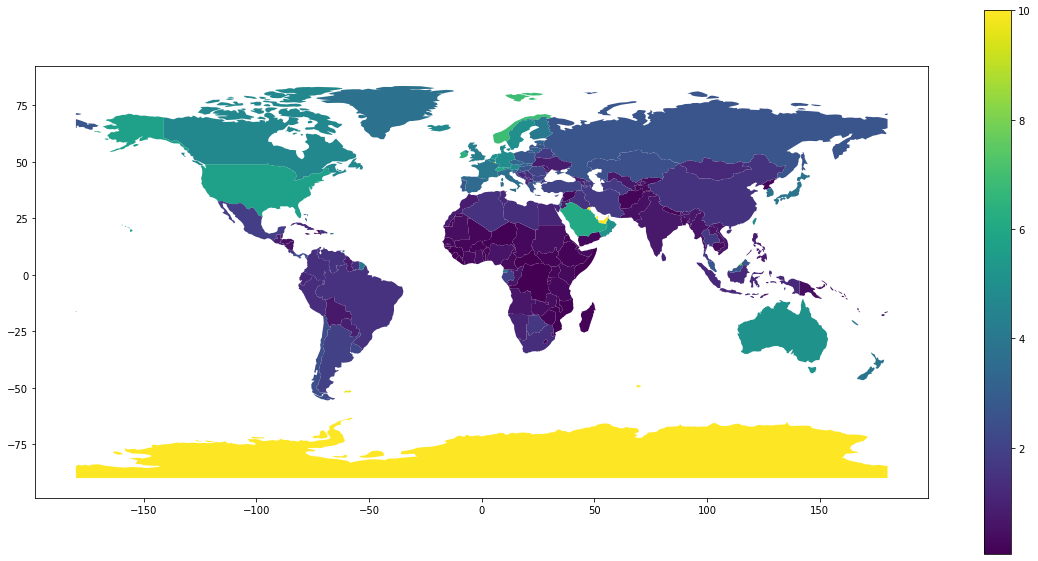

In [60]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
world.plot(column=GDP, ax=ax, legend=True)

## Indexing

* Indexing like in Pandas is possible
* Using indexing like using a geometric index

### Polygons bordering others

In [85]:
world[world.touches(slovenia)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",85033.0
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",92435.0
126,4292095,Europe,Croatia,HRV,94240.0,"POLYGON ((16.56481 46.50375, 16.88252 46.38063...",57543.0
141,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",315263.0


### Polygons within a box

In [38]:
world.loc[world.geometry.sindex.query(box(-1, 40, 8, 50), predicate="overlaps")]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geometry_ESRI:54009,area,density
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...","MULTIPOLYGON (((-5168883.083 513724.093, -5231...",645246.0,104.000894
132,48958159,Europe,Spain,ESP,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...","POLYGON ((-649206.283 4462492.961, -654668.610...",502774.0,97.376076
141,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...","MULTIPOLYGON (((825535.862 5544385.378, 874885...",315263.0,197.098302
127,8236303,Europe,Switzerland,CHE,496300.0,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...","POLYGON ((752798.109 5611883.754, 757441.420 5...",46156.0,178.444904
128,594130,Europe,Luxembourg,LUX,58740.0,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...","POLYGON ((458882.538 5886875.084, 475453.027 5...",2413.0,246.220472
129,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...","POLYGON ((463309.557 5957377.168, 458882.538 5...",30086.0,381.949943
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...","POLYGON ((1018674.630 6261050.121, 1043430.938...",356928.0,225.799088


### Polygons within a radius

In [73]:
# Create a radius around Frankfurt as a polygon
Frankfurt = gpd.GeoSeries([Point(8, 50)], crs="EPSG:4326")

Frankfurt = Frankfurt.to_crs("ESRI:54009") \
                     .buffer(99143) \
                     .squeeze()

Frankfurt_geo = gpd.GeoSeries([Frankfurt], crs="ESRI:54009").to_crs("EPSG:4326").squeeze()
Frankfurt.bounds

(509363.5489684087, 5774328.95621065, 707649.5489684087, 5972614.95621065)

In [74]:
%%time
world.loc[world.geometry.sindex.query(Frankfurt_geo, predicate="intersects")]

CPU times: user 19.1 ms, sys: 2.69 ms, total: 21.8 ms
Wall time: 20.6 ms


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geometry_ESRI:54009,area,density
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...","MULTIPOLYGON (((-5168883.083 513724.093, -5231...",645246.0,104.000894
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...","POLYGON ((1018674.630 6261050.121, 1043430.938...",356928.0,225.799088


## Joining

* joining on geometric columns could be slow if using conventional matching
* sjoin using spatial indexing to speed the process up and allow for complicated geometric joining.

In [32]:
from geopandas.tools import sjoin

In [33]:
adj = sjoin(world[["name", "geometry"]],
            world[["name", "geometry"]],
            op="touches", how="left")

In [34]:
adj.groupby("name_left") \
   .agg({
       "name_right": list
   })

,name_right
name_left,
Afghanistan,"[Pakistan, China, Tajikistan, Turkmenistan, Uz..."
Albania,"[Greece, Macedonia, Kosovo, Montenegro]"
Algeria,"[Mauritania, W. Sahara, Libya, Morocco, Tunisi..."
Angola,"[Namibia, Zambia, Dem. Rep. Congo, Congo]"
Antarctica,[nan]
...,...
W. Sahara,"[Mauritania, Algeria, Morocco]"
Yemen,"[Oman, Saudi Arabia]"
Zambia,"[Namibia, Botswana, Zimbabwe, Mozambique, Mala..."
